
# Исследование и предобработка данных


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [4]:
titanic_df = pd.read_csv('data/titanic.csv')

#первые 5 строк набора данных
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
#сводная информация о наборе данных
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
# пропуски в возрасте и стоимости билета. Для каждого пассажира с отсуствующим возрастом высчитываем среднее значение по пассажирам, у которых те же значения параметров survived, sex, pclass
titanic_df['age'] = titanic_df['age'] \
    .groupby([titanic_df['pclass'], titanic_df['survived'], titanic_df['sex']]) \
    .apply(lambda x: x.fillna(x.mean()))

titanic_df['fare'] = titanic_df['fare'] \
    .groupby([titanic_df['pclass'], titanic_df['survived'], titanic_df['sex']]) \
    .apply(lambda x: x.fillna(x.mean()))

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
# замена категориальных переменных численными с помощью one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)

titanic_df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_male,embarked_Q,embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,2,NaN,"St Louis, MO",0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,1


In [9]:
#число уникальных значений каждой переменной
titanic_df.nunique()

pclass           3
survived         2
name          1307
age            109
sibsp            7
parch            8
ticket         929
fare           282
cabin          186
boat            27
body           121
home.dest      369
sex_male         2
embarked_Q       2
embarked_S       2
dtype: int64

In [10]:
# число нулевых (NaN) значений
titanic_df.isnull().sum()

pclass           1
survived         1
name             1
age              1
sibsp            1
parch            1
ticket           1
fare             1
cabin         1015
boat           824
body          1189
home.dest      565
sex_male         0
embarked_Q       0
embarked_S       0
dtype: int64

In [11]:
# удаляем пассажиров, про которых неизвестно, выжили они или нет
titanic_df=titanic_df.dropna(subset=['survived'])

In [12]:
# число нулевых (NaN) значений
titanic_df.isnull().sum()

pclass           0
survived         0
name             0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin         1014
boat           823
body          1188
home.dest      564
sex_male         0
embarked_Q       0
embarked_S       0
dtype: int64

In [13]:
#в результате анализа избавляемся от переменных, с которыми сложнее всего работать: они по смыслу кажутся бесполезными, 
#в них слишком большая вариативность для такого маленького набора данных, 
#в них много пропусков, которые сложно восстановить
titanic_df=titanic_df.drop(["name", "ticket", "cabin", "home.dest", "body", "boat"], axis=1)

In [14]:
# смотрим, как теперь выглядит наш набор данных
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   float64
 1   survived    1309 non-null   float64
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   float64
 4   parch       1309 non-null   float64
 5   fare        1309 non-null   float64
 6   sex_male    1309 non-null   uint8  
 7   embarked_Q  1309 non-null   uint8  
 8   embarked_S  1309 non-null   uint8  
dtypes: float64(6), uint8(3)
memory usage: 75.4 KB


In [15]:
# смотрим, как теперь выглядит наш набор данных
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1


In [16]:
titanic_df["age"].describe()

count    1309.000000
mean       29.409509
std        13.208523
min         0.166700
25%        22.000000
50%        26.679598
75%        36.168240
max        80.000000
Name: age, dtype: float64

In [17]:
titanic_df["sibsp"].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [18]:
#из одной таблицы выделяем признаки и целевую переменную
X = titanic_df.drop("survived", axis=1)
Y = titanic_df["survived"]

In [19]:
#нормализуем/масшатбируем данные, чтобы они все принмали значения от 0 до 1. Это может помочь обучению, а может не помочь. Поэтому мы отдельно оставляем ненормализованные данные, отдельно нормализованные, чтобы сравнить
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
#вспомним, как выглядят данные без нормализации
X.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,25.0000,1.0,2.0,151.5500,0,0,1


In [21]:
#посмотрим, как выглядят нормализованные данные теперь
X_scaled.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.0,0.361169,0.000,0.000000,0.412503,0.0,0.0,1.0
1,0.0,0.009395,0.125,0.222222,0.295806,1.0,0.0,1.0
2,0.0,0.022964,0.125,0.222222,0.295806,0.0,0.0,1.0
3,0.0,0.373695,0.125,0.222222,0.295806,1.0,0.0,1.0
4,0.0,0.311064,0.125,0.222222,0.295806,0.0,0.0,1.0


Text(0.5, 0, 'Распределение по классам среди погибших')

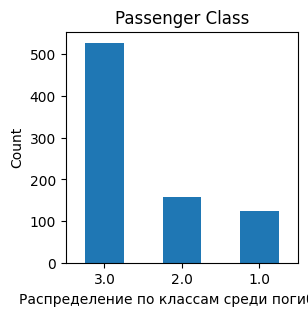

In [22]:
# Строим гистограмму распредееления классов билетов погибших
fig_size = (3, 3)

titanic_df.loc[titanic_df['survived'] == 0, 'pclass'].value_counts().plot(kind='bar', title='Passenger Class', figsize = fig_size)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Распределение по классам среди погибших')

Text(0.5, 0, 'Распределение по классам среди выживших')

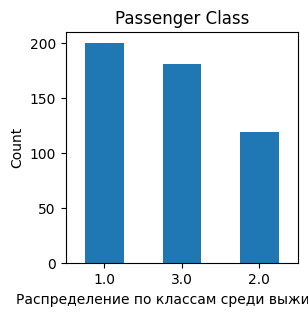

In [23]:
# Строим гистограмму распределения классов билетов выживших. Видим, что умерших из третьего класса очень много
fig_size = (3, 3)

titanic_df.loc[titanic_df['survived'] == 1, 'pclass'].value_counts().plot(kind='bar', title='Passenger Class', figsize = fig_size)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Распределение по классам среди выживших')

Text(0.5, 0, 'Распределение по классам среди выживших')

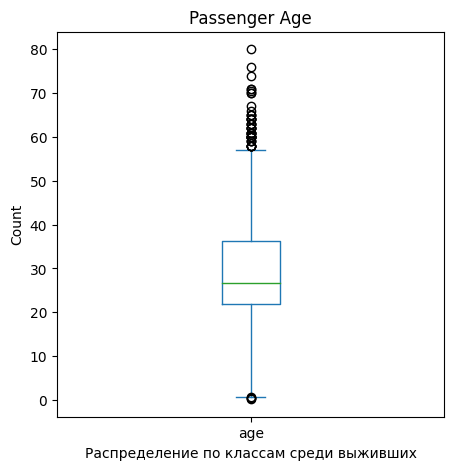

In [24]:
# Boxplot для распределения значений признака "возраст"
fig_size = (5, 5)

titanic_df['age'].plot(kind='box', title='Passenger Age', figsize = fig_size)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Распределение по классам среди выживших')

<Axes: >

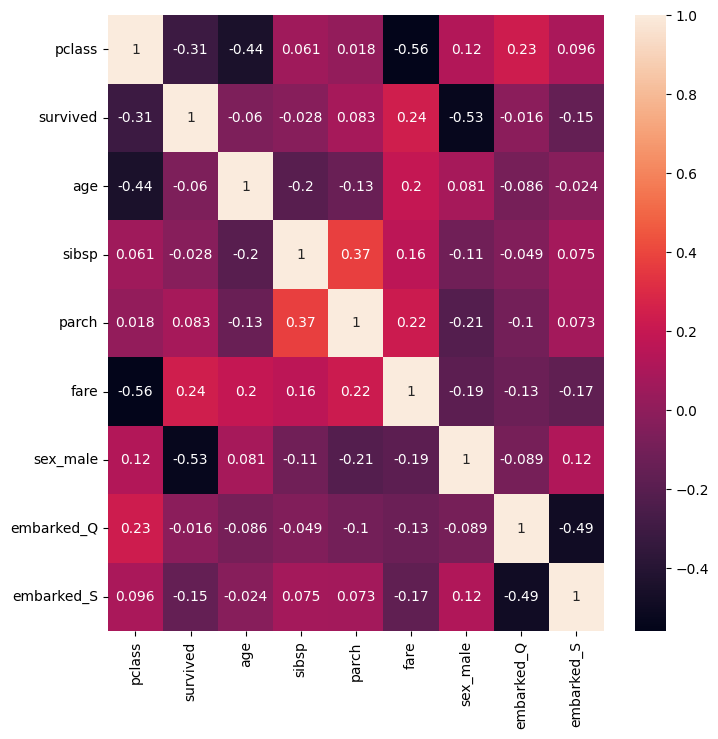

In [25]:
# можно построить корреляцию, нас интересуют корреляции с целевой переменной survived (в презе не использовала)
plt.figure(figsize=(8,8)) 
sns.heatmap(titanic_df.corr(), annot=True)

# Обучение моделей

In [26]:
#импортируем модели для машинного обучения.
#дальше обучаем модели на нормализованных даных и на обычных, чтобы увидеть разницу
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
lr = LogisticRegression(max_iter = 2000)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
 
# передадим ей тестовые и прогнозные значения
model_matrix = confusion_matrix(Y_test, Y_pred, labels = [1,0])
 
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,82,27
1,23,196


In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)

accuracy

0.8475609756097561

In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, Y_pred)

f1

0.766355140186916

In [30]:
from sklearn.metrics import fbeta_score

f2 = fbeta_score(Y_test, Y_pred, beta=2, average='binary')

f2

0.7578558225508318

In [31]:
from sklearn.metrics import fbeta_score

f0_5 = fbeta_score(Y_test, Y_pred, beta=0.5, average='binary')

f0_5

0.775047258979206

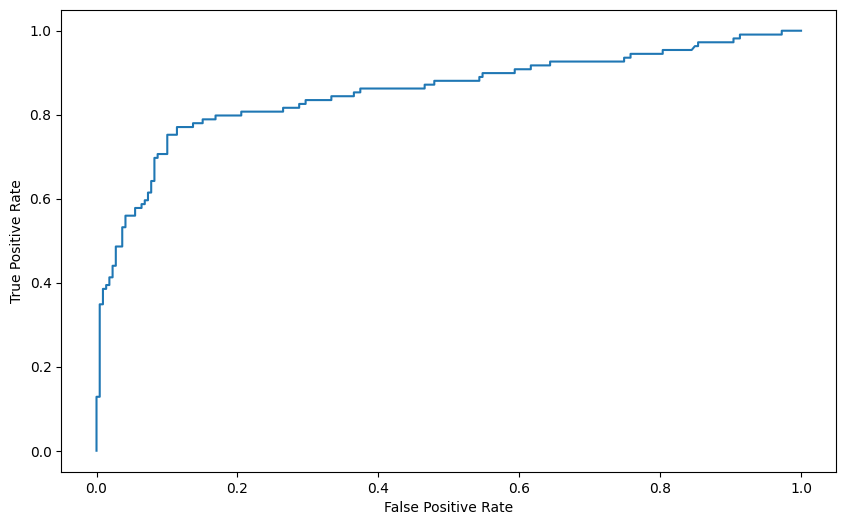

In [32]:
from sklearn.metrics import roc_curve

#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.figure(figsize = (10,6))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Обучение моделей

In [33]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X,Y,cv=5)
print(cv.mean())

0.7234125939574741


In [34]:
#тут нормализация сделала хуже
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_scaled,Y,cv=5)
print(cv.mean())

0.7195987248106226


In [35]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y,cv=5)
print(cv.mean())

0.679172881752508


In [36]:
#тут не изменилось почти ничего
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_scaled,Y,cv=5)
print(cv.mean())

0.6761194466380042


In [37]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X,Y,cv=5)
print(cv.mean())

0.621894650639057


In [38]:
#тут сильно лучше
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_scaled,Y,cv=5)
print(cv.mean())

0.697493492439531


In [39]:
#Оптимизация гиперпараметров
from sklearn.model_selection import GridSearchCV 

In [40]:
#функция для вывода на экран данных о лучшем результате одного классификатора
def clf_performance(classifier, model_name):
    print(model_name)
    print('Лучшее значение метрики: ' + str(classifier.best_score_))
    print('Параметры, на которых оно было достигнуто: ' + str(classifier.best_params_))

In [41]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X,Y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Лучшее значение метрики: 0.7417829253312276
Параметры, на которых оно было достигнуто: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
!sudo pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
